## Assignment 8 (Data visualization assignment)
#### Submitted by Varun Garg

Question : In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.


Hint:
import numpy as np<br>
import matplotlib.pyplot as plt<br>
from mpl_toolkits.mplot3d import Axes3D<br>
from sklearn import decomposition<br>
from sklearn import datasets<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x = iris.data
y = iris.target
print("Currently the dataset has " + str(x.shape[1]) + " dimensions")

Currently the dataset has 4 dimensions


Our objective is to transform the dataset into 3 dimensions. Now, we will apply principal component analysis (PCA) to this dataset for obtaining the result.<br>
The idea of principal component analysis (PCA) is to reduce the dimensionality of a dataset consisting of a large number of related variables while retaining as much variance in the data as possible.

In [6]:
pca = decomposition.PCA(n_components = 3)
pca.fit(x)
x3d = pca.transform(x)

In [7]:
print("After applying PCA we have reduced the dataset to " + str(x3d.shape[1]) + " dimensions")

After applying PCA we have reduced the dataset to 3 dimensions


### Plot :

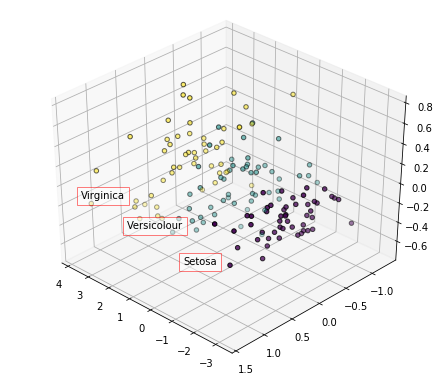

In [8]:
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0,0,1,1], elev=36, azim=134)

# ax.scatter(x3d[:, 0], x3d[:, 1], x3d[:, 2], c=y, edgecolor='k')
# plt.show()

plt.cla()

# Using text3D Model to all give dimensions to the Label of each class of the Flower in the 3d graph
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(x3d[y == label, 0].mean(),
              x3d[y == label, 1].mean() + 1.5,
              x3d[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='r', facecolor='w'))



ax.scatter(x3d[:, 0], x3d[:, 1], x3d[:, 2], c=y, edgecolor="k")

plt.show()